# 环境说明

In [10]:
!python -V

Python 3.11.5


In [6]:
import sklearn
import pandas
import numpy
import matplotlib

In [3]:
sklearn.__version__

'1.5.2'

In [4]:
pandas.__version__

'2.1.1'

In [7]:
numpy.__version__

'1.26.4'

In [14]:
matplotlib.__version__

'3.8.0'

# 代码实现

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from statsmodels.nonparametric.smoothers_lowess import lowess

In [3]:
df = pd.read_csv("data/train.csv")

In [4]:
df.head()

,Age,Blood_Sugar,Blood_Pressure,Weight,Heart_Disease
0,58,99.975461,106.328124,62.448684,0
1,71,93.609515,134.190672,67.875853,0
2,48,119.131949,115.773278,49.263101,0
3,34,98.626509,117.651983,93.111787,0
4,62,114.056088,119.456831,71.043221,0


In [5]:
label_name = 'Heart_Disease'

In [6]:
X = df.drop(label_name, axis=1)
y = df[label_name]

In [7]:
# 添加常数列（截距项）到特征中
X_ = sm.add_constant(X)

# 拟合逻辑回归模型
model = sm.Logit(y, X_)
result = model.fit()

# 输出模型摘要
print(result.summary())

# 进行预测（概率值）
y_pred_prob = result.predict(X_)
# 将概率值转化为0/1预测类别，使用阈值0.5
y_pred_class = (y_pred_prob > 0.5).astype(int)
# 计算准确率
accuracy = accuracy_score(y, y_pred_class)
print(f"准确率: {accuracy:.4f}")

# 计算AUC（曲线下面积）
auc = roc_auc_score(y, y_pred_prob)
print(f"AUC: {auc:.4f}")

D:\software\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.022594
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.8405
Time:                        14:20:44   Log-Likelihood:                -22.594
converged:                       True   LL-Null:                       -141.63
Covariance Type:            nonrobust   LLR p-value:                 2.421e-50
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -109.6707     24.800     -4.422      0.000    -158.278     -61.064
Age             

# 校准曲线

In [10]:
import numpy as np

# 假设 predicted 是一个已定义的列表或数组
predy = None  # predy 初始为空

if predy is None:
    n = len(y_pred_prob)  # 获取 predicted 的长度
    if n < 11:
        raise ValueError("must have n > 10 if do not specify predy")
    
    p = np.sort(y_pred_prob)  # 对 predicted 进行排序
    predy = np.linspace(p[4], p[n-5], num=50)  # 创建一个从 p[5] 到 p[n-4] 的等间隔序列，长度为 50
    p = None  # 清空 p

In [11]:
predy

array([6.48726475e-24, 2.04054528e-02, 4.08109056e-02, 6.12163585e-02,
       8.16218113e-02, 1.02027264e-01, 1.22432717e-01, 1.42838170e-01,
       1.63243623e-01, 1.83649075e-01, 2.04054528e-01, 2.24459981e-01,
       2.44865434e-01, 2.65270887e-01, 2.85676339e-01, 3.06081792e-01,
       3.26487245e-01, 3.46892698e-01, 3.67298151e-01, 3.87703604e-01,
       4.08109056e-01, 4.28514509e-01, 4.48919962e-01, 4.69325415e-01,
       4.89730868e-01, 5.10136321e-01, 5.30541773e-01, 5.50947226e-01,
       5.71352679e-01, 5.91758132e-01, 6.12163585e-01, 6.32569037e-01,
       6.52974490e-01, 6.73379943e-01, 6.93785396e-01, 7.14190849e-01,
       7.34596302e-01, 7.55001754e-01, 7.75407207e-01, 7.95812660e-01,
       8.16218113e-01, 8.36623566e-01, 8.57029018e-01, 8.77434471e-01,
       8.97839924e-01, 9.18245377e-01, 9.38650830e-01, 9.59056283e-01,
       9.79461735e-01, 9.99867188e-01])

## lowess平滑

lowess（局部加权回归）是 R 语言中用于平滑数据的一个函数。它通过对数据点使用局部加权回归（Locally Weighted Scatterplot Smoothing, LOWESS）方法来创建平滑的曲线，从而使得原始数据的噪声得到平滑处理，并揭示出数据的趋势或模式。

In [12]:
y_true, y_prob = y, y_pred_prob

In [16]:
(max(y_prob) - min(y_prob)) * 0.01

0.009999982225169384

In [28]:
smoothed = lowess(y_true, y_prob
                  ,frac=2/3 # frac 参数类似于 R 中的 f，控制窗口大小
                  ,it=0
                  ,delta=(max(y_prob) - min(y_prob)) * 0.01
                 )  

In [29]:
pd.DataFrame(smoothed)

,0,1
0,1.987025e-25,0.000000
1,7.686511e-25,0.000000
2,4.362426e-24,0.000000
3,5.679777e-24,0.000000
4,6.487265e-24,0.000000
...,...,...
995,9.998672e-01,1.033531
996,9.999153e-01,1.033593
997,9.999736e-01,1.033669
998,9.999972e-01,1.033700


## 传统方法

In [8]:
is_boot = True

In [9]:
y_true, y_prob = y, y_pred_prob

In [28]:
prob_true, prob_pred

(array([0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.5       , 0.33333333, 1.        , 0.        , 0.        ,
        0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.66666667, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 array([1.86707822e-04, 2.70279889e-02, 5.02487970e-02, 7.40332178e-02,
        9.04376774e-02, 1.16200891e-01, 1.25660136e-01, 1.66568734e-01,
        1.93363122e-01, 2.02501641e-01, 2.23019447e-01, 2.87162350e-01,
        3.33455867e-01, 3.86384898e-01, 4.18482476e-01, 4.35094871e-01,
        4.50239775e-01, 5.77491930e-01, 5.85845670e-01, 6.24078936e-01,
        7.45296936e-01, 7.67041249e-01, 8.06029164e-01, 8.34832384e-01,
        8.56486434e-01, 9.26272793e-01, 9.49579154e-01, 9.75274737e-01,
        9.98321916e-01]))

In [29]:
prob_true.shape, prob_pred.shape

((29,), (29,))

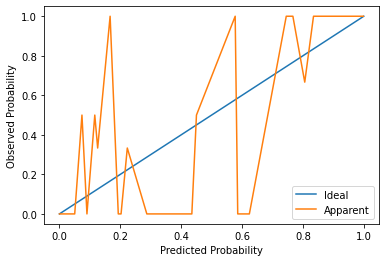

In [27]:
# 计算普通的校准曲线
prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=50)
# "Ideal" 理想校准曲线 (y=x)
ideal_line = [0, 1]
plt.figure()
# 开始画图
# Ideal (理想曲线)
plt.plot(ideal_line, ideal_line, label='Ideal')
# Apparent (表观曲线)
plt.plot(prob_pred, prob_true, label='Apparent')
# # 是否进行Boostrap有放回的采样
# if is_boot:
#     length = len(y_true)
#     boot_num = int(90 * length / 100)
#     np.random.seed(1024)  # 设置随机种子
#     bootstrap_curves = []
#     for i in range(100):
#         indices = np.random.choice(length, boot_num, replace=True)
#         y_resample_probs = y_prob[indices]
#         y_resample_true = y_true[indices]
#         # 计算重采样后的校准曲线
#         boot_prob_true, boot_prob_pred = calibration_curve(y_resample_true, y_resample_probs, n_bins=10, strategy='quantile')
#         # https://chatgpt.com/share/670f779b-c910-8010-92ab-7587668e7f48
#         # 使用插值来保证所有曲线的长度一致
#         # 对 true 和 pred 都进行插值，确保曲线长度一致
#         boot_prob_true_interp = np.interp(prob_pred, boot_prob_pred, boot_prob_true)
#         boot_prob_pred_interp = np.interp(prob_pred, boot_prob_pred, boot_prob_pred)
#         # 将插值后的校准曲线保存
#         bootstrap_curves.append((boot_prob_true_interp, boot_prob_pred_interp))
#     # 计算偏差校正后的平均校准曲线
#     mean_prob_true = np.mean([curve[0] for curve in bootstrap_curves], axis=0)
#     mean_prob_pred = np.mean([curve[1] for curve in bootstrap_curves], axis=0)
#     plt.plot(mean_prob_pred, mean_prob_true,label='Boostrap')
# 设置标签和图例
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Probability')
plt.legend()